<a href="https://colab.research.google.com/github/RostislavB74/DS_HW7/blob/main/dz7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163007 sha256=9a3b30cd3b23d8071b4b3e6337f107c849e9ca6906b383a0fdb415b2bdec4f09
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import pandas as pd
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise import Dataset, Reader
from surprise.prediction_algorithms import SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, CoClustering, BaselineOnly, NormalPredictor
import datetime
import random
import time
import numpy as np
from surprise import (
    BaselineOnly,
    CoClustering,
    Dataset,
    KNNBaseline,
    KNNBasic,
    KNNWithMeans,
    NMF,
    NormalPredictor,
    SlopeOne,
    SVD,
    SVDpp,
)
from surprise.model_selection import cross_validate, KFold
from tabulate import tabulate

In [3]:
data = Dataset.load_builtin('ml-100k', prompt=False)


Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


Опис архіву  
===============================================



In [ ]:
# MovieLens набори даних були зібрані дослідницьким проектом GroupLens
# в Університеті Міннесоти.

# Цей набір даних складається з:
# 	* 100 000 оцінок (1-5) від 943 користувачів для 1682 фільмів.
# 	* Кожен користувач оцінив щонайменше 20 фільмів.
#         * Проста демографічна інформація для користувачів (вік, стать, професія, поштовий індекс)

# Дані збиралися через веб-сайт MovieLens
# (movielens.umn.edu) протягом семимісячного періоду з 19 вересня
# 1997 року по 22 квітня 1998 року. дані очищено - користувачів
# , які мали менше 20 оцінок або не мали повної демографічної
# інформації, було видалено з цього набору даних. Детальний опис
# файлу даних можна знайти в кінці цього файлу.

# Ні Університет Міннесоти, ні будь-хто із
# залучених дослідників не може гарантувати правильність даних, їх придатність
# для будь-якої конкретної мети або достовірність результатів, заснованих на
# використанні набору даних. Набір даних можна використовувати для будь-яких дослідницьких
# цілей за таких умов:

#      * Користувач не має права заявляти чи натякати на будь-яке схвалення Університету
#        Міннесоти чи дослідницької групи GroupLens.

#      * Користувач повинен підтвердити використання набору даних у
#        публікаціях, отриманих у результаті використання набору даних
#        (див. інформацію про цитування нижче).

#      * Користувач не може перерозповсюджувати дані без окремого
#        дозволу.

#      * Користувачеві забороняється використовувати цю інформацію в будь-яких комерційних
#        цілях або для отримання прибутку без попереднього отримання дозволу
#        від викладача дослідницького проекту GroupLens в Університеті
#        Міннесоти.

# Якщо у вас є додаткові запитання чи коментарі, зв’яжіться з GroupLens
# <grouplens-info@cs.umn.edu>.

# CITATION
# ===============================================

# Для підтвердження використання набору даних у публікаціях, будь ласка, процитуйте таку
# статтю:

# Ф. Максвелл Харпер і Джозеф А. Констан. 2015. Набори даних MovieLens:
# історія та контекст. Транзакції ACM щодо інтерактивних інтелектуальних
# систем (TiiS) 5, 4, стаття 19 (грудень 2015), 19 сторінок.
# DOI=http://dx.doi.org/10.1145/2827872

# ПОДЯКА
# =================================== ============

# Дякую Елу Борчерсу за очищення цих даних і написання
# супровідних сценаріїв.

# ПУБЛІКОВАНА РОБОТА, ЯКА ВИКОРИСТОВУВАЛА ЦЕЙ НАБІР ДАНИХ
# ============================================= ===

# Херлокер, Дж., Констан, Дж., Борчерс, А., Рідл, Дж.. Алгоритмічна
# структура для виконання спільної фільтрації. Матеріали
# конференції 1999 року з досліджень і розробок у
# сфері пошуку інформації. Серпень 1999 р.

# ДОДАТКА ІНФОРМАЦІЯ ПРО ПРОЕКТ ДОСЛІДЖЕННЯ GROUPLENS
# ========================================== =======

# Дослідницький проект GroupLens є дослідницькою групою Департаменту
# комп’ютерних наук та інженерії Університету Міннесоти.
# Члени дослідницького проекту GroupLens беруть участь у багатьох
# дослідницьких проектах, пов’язаних із фільтрацією інформації,
# спільною фільтрацією та системами рекомендацій. Керують проектом
# професори Джон Рідл і Джозеф Констан. Проект почав
# досліджувати автоматизовану спільну фільтрацію в 1992 році, але найбільш
# відомий своїм всесвітнім випробуванням автоматизованої спільної
# системи фільтрації для новин Usenet у 1996 році. Технологія, розроблена під час
# випробування Usenet, лягла в основу формування мережевого сприйняття,
# Inc., яка була заснована членами GroupLens Research. З тих пір
# проект розширив свою сферу дослідження загальних
# рішень фільтрації інформації, інтегруючи методи на основі контенту, а також
# вдосконалюючи поточну технологію спільної фільтрації.

# Додаткову інформацію про проект GroupLens Research, включно з
# дослідницькими публікаціями, можна знайти на веб-сайті:

#         http://www.grouplens.org/

# GroupLens Research наразі працює з рекомендацією фільмів на основі
# спільної фільтрації:

#         http://www.movielens .org/

# ДЕТАЛЬНИЙ ОПИС ФАЙЛОВ ДАНИХ
# ============================================ ====

# Ось короткий опис даних.

# ml-data.tar.gz -- Стиснутий файл tar. Щоб відновити файли даних u, виконайте наступне:
#                 gunzip ml-data.tar.gz
#                 tar xvf ml-data.tar
#                 mku.sh

# u.data -- Повний набір даних u, 100 000 оцінок від 943 користувачів для 1682 елементів.
#               Кожен користувач оцінив не менше 20 фільмів. Користувачі та елементи
#               нумеруються послідовно від 1. Дані впорядковуються випадковим чином
#               . Це розділений вкладками список
# 	         ідентифікаторів користувачів | ідентифікатор товару | рейтинг | позначка часу.
#               Часові позначки є секундами Unix з 1/1/1970 UTC

# u.info -- кількість користувачів, елементів і оцінок у наборі даних u.

# u.item -- Інформація про елементи (фільми); це розділений вкладками
#               список
#               ідентифікатор фільму | назва фільму | Дата випуску | дата випуску відео |
#               IMDb URL | невідомий | Дія | Пригода | Анімація |
#               Дитячий | Комедія | Злочин | Документальний | Драма | Фантазія |
#               Фільм Нуар | Жах | Музичний | Таємниця | Романтика | Наукова фантастика |
#               Трилер | Війна | Західний |
#               Останні 19 полів — це жанри, 1 означає, що фільм
#               належить до цього жанру, 0 — ні; фільми можуть бути в
#               кількох жанрах одночасно.
#               Ідентифікатори фільмів використовуються в наборі даних u.data.

# u.genre -- список жанрів.

# u.user -- Демографічна інформація про користувачів; це
#               розділений вкладками список
#               ідентифікаторів користувачів | вік | стать | професія | поштовий індекс
#               Ідентифікатори користувачів використовуються в наборі даних u.data.

# u.occupation -- список професій.

# u1.base – набори даних від u1.base і u1.test до u5.base і u5.test
# u1.test є 80%/20% поділом даних u на навчальні та тестові дані.
# u2.base Кожен з u1, ..., u5 має непересічні тестові набори; це якщо для
# u2.test 5-кратна перехресна перевірка (де ви повторюєте свій експеримент
# u3.base з кожним навчальним і тестовим набором і усереднюєте результати).
# u3.test Ці набори даних можуть бути згенеровані з u.data mku.sh.
# u4.base
# u4.test
# u5.base
# u5.test

# ua.base -- набори даних ua.base, ua.test, ub.base і ub.test
# ua.test розділяють дані u на навчальний набір і тестовий встановити за допомогою
# ub.base рівно 10 оцінок на користувача в тестовому наборі. Множини
# ub.test ua.test і ub.test є непересічними. Ці набори даних можуть
#               бути згенеровані з u.data mku.sh.

# allbut.pl -- Сценарій, який генерує навчальні та тестові набори, де
#               всі рейтинги користувачів, окрім n, містяться в навчальних даних.

# mku.sh -- сценарій оболонки для генерації всіх наборів даних u з u.data.

In [4]:
from pathlib import Path
base_path = Path("/root/.surprise_data/ml-100k/ml-100k")
filelist =  list(map(lambda x: x.name, sorted(base_path.glob("u*"))))
types = {
    "test": "Test_files",
    "base": "Train_files"
}
for f, d in types.items():
  print(f"\n{d}:")
  print(list(filter(lambda x : x.endswith(f".{f}") ,filelist)))


Test_files:
['u1.test', 'u2.test', 'u3.test', 'u4.test', 'u5.test', 'ua.test', 'ub.test']

Train_files:
['u1.base', 'u2.base', 'u3.base', 'u4.base', 'u5.base', 'ua.base', 'ub.base']


In [5]:
latest_url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
latest_zip_file = Path("ml-latest-small.zip")
if not latest_zip_file.exists():
  !wget -q {latest_url}
latest_zip_file
base_path = Path("/content/ml-latest-small/")
rating_csv = base_path.joinpath("ratings.csv")
tags_csv = base_path.joinpath("tags.csv")
movies_csv = base_path.joinpath("movies.csv")

In [6]:
SEED = 42
algo_cv = {}
algo_split = {}
# Use the SVD algorithm.
algo = SVD(random_state=SEED)


# Інформація про датасет

# Інформація знаходиться в кількох файлах

In [8]:
type(data)

surprise.dataset.DatasetAutoFolds

In [12]:
from datetime import date

dater = None

# Access dataset attributes
raw_ratings = data.raw_ratings
print("Number of ratings:", len(raw_ratings))

# Print a sample of raw ratings
print("\nTop 5 samples of raw ratings:")
for rating in raw_ratings[:5]:
  uid, iid, ur, timestamp = rating
  if timestamp:
    dater = date.fromtimestamp(int(timestamp))
  print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")

search_uid = uid
count_uid = 5
print(f"\nTop {count_uid} ratings of user: {search_uid}")

for rating in raw_ratings:
  uid, iid, ur, timestamp = rating
  if uid == search_uid:
    if timestamp:
      dater = date.fromtimestamp(int(timestamp))
    count_uid -= 1;
    print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")
    if count_uid <= 0:
      break

search_iid = iid
count_iid = 5
print(f"\nTop {count_iid} ratings of item: {search_iid}")

for rating in raw_ratings:
  uid, iid, ur, timestamp = rating
  if iid == search_iid:
    if timestamp:
      dater = date.fromtimestamp(int(timestamp))
    count_iid -= 1;
    print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")
    if count_iid <= 0:
      break

Number of ratings: 100000

Top 5 samples of raw ratings:
UserID: 196  , ItemID: 242  , UserRateForItem:   3.0, date: 1997-12-04
UserID: 186  , ItemID: 302  , UserRateForItem:   3.0, date: 1998-04-04
UserID: 22   , ItemID: 377  , UserRateForItem:   1.0, date: 1997-11-07
UserID: 244  , ItemID: 51   , UserRateForItem:   2.0, date: 1997-11-27
UserID: 166  , ItemID: 346  , UserRateForItem:   1.0, date: 1998-02-02

Top 5 ratings of user: 166
UserID: 166  , ItemID: 346  , UserRateForItem:   1.0, date: 1998-02-02
UserID: 166  , ItemID: 328  , UserRateForItem:   5.0, date: 1998-02-02
UserID: 166  , ItemID: 322  , UserRateForItem:   5.0, date: 1998-02-02
UserID: 166  , ItemID: 288  , UserRateForItem:   3.0, date: 1998-02-02
UserID: 166  , ItemID: 258  , UserRateForItem:   4.0, date: 1998-02-02

Top 5 ratings of item: 258
UserID: 26   , ItemID: 258  , UserRateForItem:   3.0, date: 1998-03-31
UserID: 66   , ItemID: 258  , UserRateForItem:   4.0, date: 1997-12-31
UserID: 207  , ItemID: 258  , UserR

In [9]:
ratings_file = '/root/.surprise_data/ml-100k/ml-100k/u.data'

ratings_data = pd.read_csv(ratings_file, sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

print("Рейтинги фільмів:")
print(ratings_data.head())

Рейтинги фільмів:
   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596


u.info -- кількість користувачів, елементів і оцінок у наборі даних u.

In [10]:
info_file = '/root/.surprise_data/ml-100k/ml-100k/u.info'

info_data = pd.read_csv(info_file, sep='\t', names=['userId'])

print("кількість користувачів, елементів і оцінок у наборі даних u:")
print(info_data.head())



кількість користувачів, елементів і оцінок у наборі даних u:
           userId
0       943 users
1      1682 items
2  100000 ratings


In [11]:
import pandas as pd

file_path = '/root/.surprise_data/ml-100k/ml-100k/u.item'

columns = [
    'movieId', 'title', 'release_date', 'video_release_date',
    'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
    'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
    'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
    'Sci-Fi', 'Thriller', 'War', 'Western'
]

movies_df = pd.read_csv(file_path, sep='|', encoding='latin-1', header=None, names=columns)

print(movies_df.head())


   movieId              title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        3  Four Rooms (1995)  01-Jan-1995                 NaN   
3        4  Get Shorty (1995)  01-Jan-1995                 NaN   
4        5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1         1  ...        0          0       0        0   
1     

In [14]:
file_path = '/root/.surprise_data/ml-100k/ml-100k/u.user'

columns = ['userId', 'age', 'gender', 'occupation', 'zip_code']

users_df = pd.read_csv(file_path, sep='|', header=None, names=columns)

print(users_df.head())


   userId  age gender  occupation zip_code
0       1   24      M  technician    85711
1       2   53      F       other    94043
2       3   23      M      writer    32067
3       4   24      M  technician    43537
4       5   33      F       other    15213


In [15]:
genre_file = '/root/.surprise_data/ml-100k/ml-100k/u.genre'
genre_data = pd.read_csv(genre_file, sep='\t', names=['genreId'])

print("Жанри фільмів")
print(genre_data.head())



Жанри фільмів
        genreId
0     unknown|0
1      Action|1
2   Adventure|2
3   Animation|3
4  Children's|4


In [16]:
file_path = '/root/.surprise_data/ml-100k/ml-100k/u.occupation'

with open(file_path, 'r') as file:
    occupations = file.readlines()

occupations = [occupation.strip() for occupation in occupations]

print(occupations)



['administrator', 'artist', 'doctor', 'educator', 'engineer', 'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer', 'librarian', 'marketing', 'none', 'other', 'programmer', 'retired', 'salesman', 'scientist', 'student', 'technician', 'writer']


In [17]:
num_ratings = len(data.raw_ratings)
print("Кількість рейтингів:", num_ratings)


Кількість рейтингів: 100000


#Будуємо модель матричної факторизації SVD


In [25]:
for i in range(1, 6):
    train_file = f'/root/.surprise_data/ml-100k/ml-100k/u{i}.base'
    test_file = f'/root/.surprise_data/ml-100k/ml-100k/u{i}.test'


    reader = Reader(line_format='user item rating timestamp', sep='\t')
    train_data = Dataset.load_from_file(train_file, reader=reader)
    test_data = Dataset.load_from_file(test_file, reader=reader)


    trainset = train_data.build_full_trainset()
    testset = test_data.build_full_trainset().build_testset()

    algo = SVD()

    algo.fit(trainset)

    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    print(f"RMSE for u{i}.test:", rmse.round(4))
    print(f"MAE for u{i}.test:", mae.round(4))



RMSE: 0.9513
MAE:  0.7497
RMSE for u1.test: 0.9513
MAE for u1.test: 0.7497
RMSE: 0.9381
MAE:  0.7380
RMSE for u2.test: 0.9381
MAE for u2.test: 0.738
RMSE: 0.9334
MAE:  0.7351
RMSE for u3.test: 0.9334
MAE for u3.test: 0.7351
RMSE: 0.9341
MAE:  0.7366
RMSE for u4.test: 0.9341
MAE for u4.test: 0.7366
RMSE: 0.9335
MAE:  0.7395
RMSE for u5.test: 0.9335
MAE for u5.test: 0.7395


модель демонструє досить низькі значення RMSE і MAE для тестових даних, що є позитивним показником. Це свідчить про те, що модель рекомендацій добре прогнозує оцінки користувачів для нових елементів.

In [18]:
reader = Reader()

dataset = data.build_full_trainset()

algorithms = [SVD()]

for algorithm in algorithms:
    print(f"Evaluating {algorithm.__class__.__name__}...")
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=True)
    print(f"Mean RMSE for {algorithm.__class__.__name__}: {results['test_rmse'].mean()}")

Evaluating SVD...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9328  0.9386  0.9374  0.9382  0.9359  0.9366  0.0021  
Fit time          1.31    1.34    1.32    1.30    1.30    1.31    0.02    
Test time         0.12    0.12    0.12    0.23    0.14    0.15    0.04    
Mean RMSE for SVD: 0.9365948166148209


In [13]:
def data_full_trainset(algo, data):
  algorithm_name = algo.__class__.__name__
  print(f"Algo: {algorithm_name}, UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")

  #trainset, testset = train_test_split(data, test_size=0.25)
  trainset = data.build_full_trainset()

  print("Number of train ratings:", len(list(trainset.all_ratings())))
  algo.fit(trainset)
  pred = algo.predict(uid, iid, r_ui=ur, verbose=True)

  testset = trainset.build_testset()
  print("Number of test ratings:", len(testset))

  predictions = algo.test(testset)
  # RMSE має бути низьким, оскільки ми є упередженими
  accuracy.rmse(predictions, verbose=True)  # ~ 0.68 (що є низьким показником)


data_full_trainset(algo, data)


Algo: SVD, UserID: 6    , ItemID: 258  , UserRateForItem:   2.0, date: 1997-12-28
Number of train ratings: 100000
user: 6          item: 258        r_ui = 2.00   est = 2.60   {'was_impossible': False}
Number of test ratings: 100000
RMSE: 0.6752


In [24]:
algorithms = [
    SVD(),
    SVDpp(cache_ratings=False),
    SVDpp(cache_ratings=True),
    NMF(),
    SlopeOne(),
    KNNBasic(),
    KNNWithMeans(),
    KNNWithZScore(),
    KNNBaseline(),
    CoClustering(),
    BaselineOnly(),
    NormalPredictor()
]

results = {}

for algo in algorithms:
    print(f"Evaluating {algo.__class__.__name__}...")
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mean_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
    mean_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])
    mean_time = sum(cv_results['fit_time']) / len(cv_results['fit_time'])
    results[algo.__class__.__name__] = {'RMSE': mean_rmse, 'MAE': mean_mae, 'Time': mean_time}

for algo, metrics in results.items():
    print(f"{algo}: RMSE={metrics['RMSE']}, MAE={metrics['MAE']}, Time={metrics['Time']}")


Evaluating SVD...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9335  0.9296  0.9472  0.9322  0.9363  0.9358  0.0061  
MAE (testset)     0.7362  0.7330  0.7473  0.7343  0.7379  0.7377  0.0051  
Fit time          1.28    1.89    1.31    1.32    1.32    1.43    0.23    
Test time         0.14    0.47    0.13    0.17    0.34    0.25    0.13    
Evaluating SVDpp...
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9173  0.9119  0.9281  0.9210  0.9285  0.9213  0.0063  
MAE (testset)     0.7201  0.7112  0.7257  0.7242  0.7296  0.7222  0.0063  
Fit time          26.50   26.36   26.40   26.64   27.01   26.58   0.23    
Test time         5.05    4.17    5.36    4.15    4.37    4.62    0.49    
Evaluating SVDpp...
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  

In [19]:
import time
import datetime
from tabulate import tabulate
np.random.seed(0)
random.seed(0)

kf = KFold(random_state=0)  # folds will be the same for all algorithms.


In [48]:
algos = (
    SVD(random_state=0),
    SVDpp(random_state=0, cache_ratings=False),
    SVDpp(random_state=0, cache_ratings=True),
    NMF(random_state=0),
    SlopeOne(),
    KNNBasic(),
    KNNWithMeans(),
    KNNBaseline(),
    CoClustering(random_state=0),
    BaselineOnly(),
    NormalPredictor(),
)

results = {}

for algo in algos:
    start = time.time()
    out = cross_validate(algo, data, ["rmse", "mae"], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    mean_rmse = "{:.3f}".format(np.mean(out["test_rmse"]))
    mean_mae = "{:.3f}".format(np.mean(out["test_mae"]))

    results[algo.__class__.__name__] = {'RMSE': mean_rmse, 'MAE': mean_mae, 'Time': cv_time}

header = ["Algorithm", "RMSE", "MAE", "Time"]
table = []

for algo, metrics in results.items():
    table.append([algo, metrics['RMSE'], metrics['MAE'], metrics['Time']])

print(tabulate(table, header, tablefmt="pipe"))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity ma

In [49]:
results

{'SVD': {'RMSE': '0.934', 'MAE': '0.737', 'Time': '0:00:09'},
 'SVDpp': {'RMSE': '0.919', 'MAE': '0.721', 'Time': '0:02:09'},
 'NMF': {'RMSE': '0.963', 'MAE': '0.758', 'Time': '0:00:12'},
 'SlopeOne': {'RMSE': '0.946', 'MAE': '0.743', 'Time': '0:00:18'},
 'KNNBasic': {'RMSE': '0.980', 'MAE': '0.774', 'Time': '0:00:20'},
 'KNNWithMeans': {'RMSE': '0.951', 'MAE': '0.749', 'Time': '0:00:20'},
 'KNNBaseline': {'RMSE': '0.931', 'MAE': '0.733', 'Time': '0:00:23'},
 'CoClustering': {'RMSE': '0.963', 'MAE': '0.753', 'Time': '0:00:12'},
 'BaselineOnly': {'RMSE': '0.944', 'MAE': '0.748', 'Time': '0:00:03'},
 'NormalPredictor': {'RMSE': '1.520', 'MAE': '1.217', 'Time': '0:00:02'}}

In [30]:
# algorithm_results = [(algo, float(results[algo]['RMSE']), float(results[algo]['MAE'])) for algo in results]

# sorted_results_rmse = sorted(algorithm_results, key=lambda x: x[1])

# sorted_results_mae = sorted(algorithm_results, key=lambda x: x[2])



In [50]:
algorithm_results = [(algo, float(results[algo]['RMSE']), float(results[algo]['MAE']), results[algo]['Time']) for algo in results]

sorted_results_rmse = sorted(algorithm_results, key=lambda x: x[1])
sorted_results_mae = sorted(algorithm_results, key=lambda x: x[2])
sorted_results_time = sorted(algorithm_results, key=lambda x: int(x[3].split(':')[0]) * 3600 + int(x[3].split(':')[1]) * 60 + int(x[3].split(':')[2]))



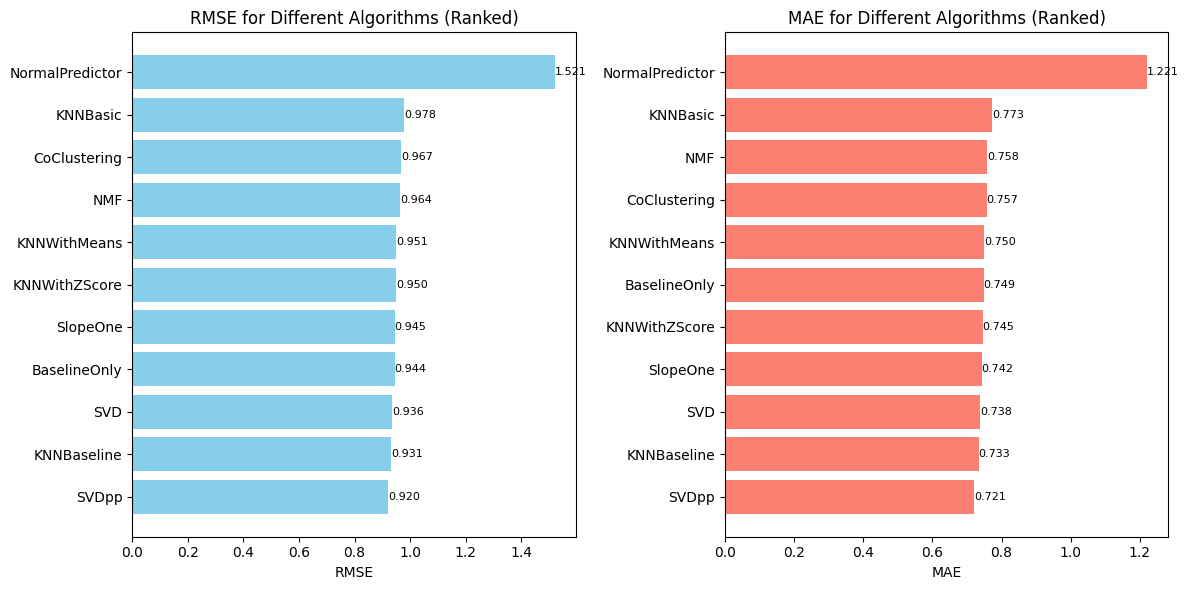

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
algorithms_rmse, rmse_values, _ = zip(*sorted_results_rmse)
for i, (algorithm, rmse) in enumerate(zip(algorithms_rmse, rmse_values)):
    plt.text(rmse, i, f'{rmse:.3f}', ha='left', va='center', fontsize=8)
plt.barh(algorithms_rmse, rmse_values, color='skyblue')
plt.xlabel('RMSE')
plt.title('RMSE for Different Algorithms (Ranked)')

plt.subplot(1, 2, 2)
algorithms_mae, _, mae_values = zip(*sorted_results_mae)
for i, (algorithm, mae) in enumerate(zip(algorithms_mae, mae_values)):
    plt.text(mae, i, f'{mae:.3f}', ha='left', va='center', fontsize=8)
plt.barh(algorithms_mae, mae_values, color='salmon')
plt.xlabel('MAE')
plt.title('MAE for Different Algorithms (Ranked)')

plt.tight_layout()
plt.show()


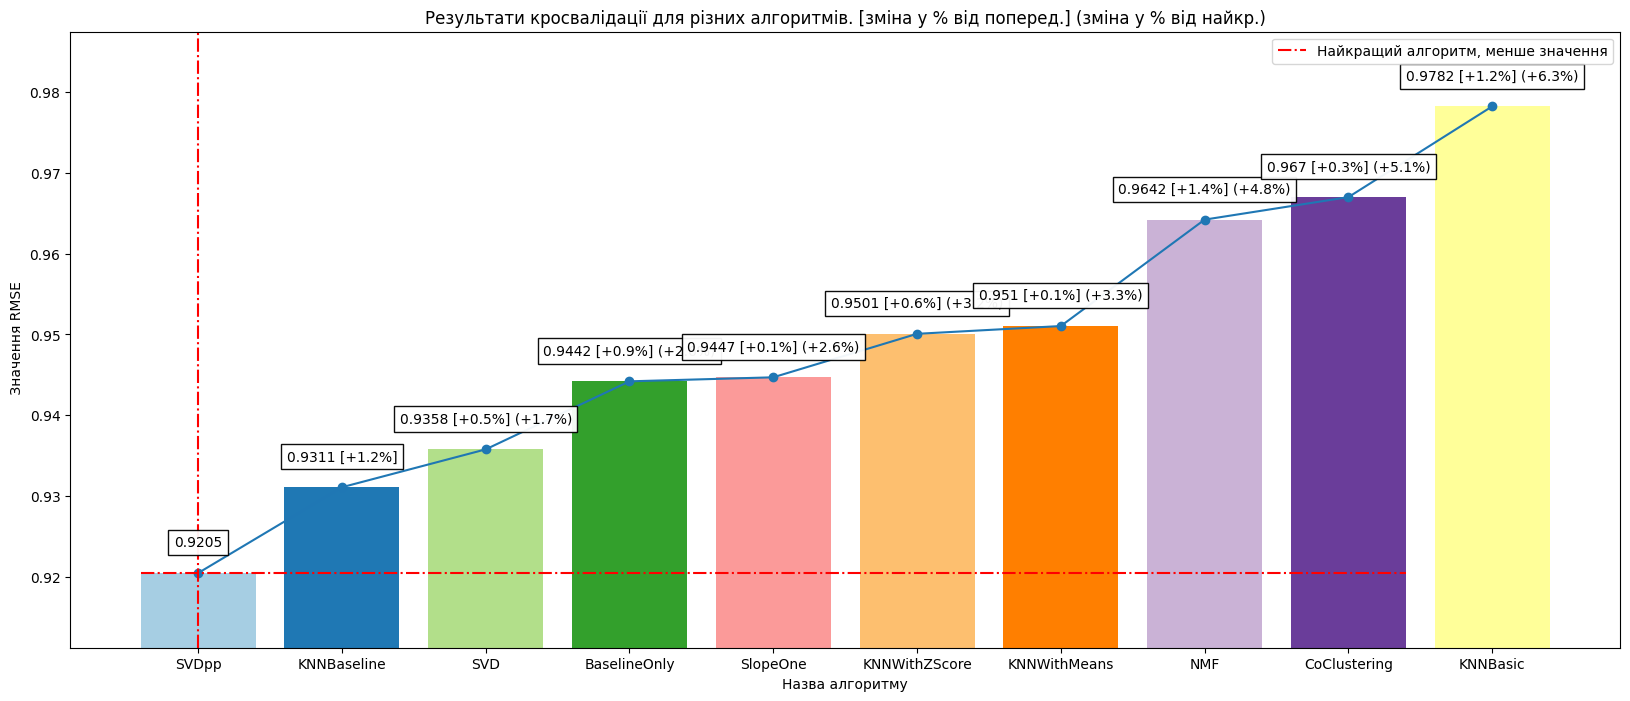

Найкращий алгоритм: SVDpp, зі значенням: 0.9205


In [32]:
def plot_algo_ranked(input_data: list, title_type: str="", ylabel_type: str="RMSE", column=None):
    # Без результату NormalPredictor
    x = range(len(input_data) - 1)
    if column is None:
        y = [v[1] for v in input_data[:-1]]
    else:
        y = [v[column] for v in input_data[:-1]]

    y = np.array(y)

    plt.figure(figsize=(20, 8))
    h_y = y[-1] -  y[0]
    max_y = y[-1] + h_y * 0.16
    min_y = y[0] - h_y * 0.16
    min_y = 0 if min_y < 0 else min_y
    plt.ylim(min_y, max_y)
    plt.title(f"Результати {title_type} для різних алгоритмів. [зміна у % від поперед.] (зміна у % від найкр.)")

    cmap = plt.get_cmap('Paired')
    num_colors = len(x)
    colors_map = [cmap(i / num_colors) for i in range(num_colors)]
    colors = colors_map

    bar_w = 0.8

    plt.bar(x, height=y, width=bar_w, color=colors)
    plt.xticks(x, [v[0] for v in input_data[:-1]] )
    plt.plot(x, y, "o-")
    plt.xlabel("Назва алгоритму")
    plt.ylabel(ylabel_type)
    plt.vlines(x[0], min_y, max_y, color="red", linestyle="-.", label="Найкращий алгоритм, менше значення")
    plt.hlines(y[0], -bar_w / 2, len(x) - 2 + bar_w / 2, color="red", linestyle="-.")
    diff_y = np.diff(y) / y[:-1] * 100
    diff_y_best = y / y[0] * 100 - 100

    for i, val in enumerate(y):
        text = str(round(val, 4))
        if i > 0:
            text += f" [{round(diff_y[i-1], 1):+,}%]"
        if i > 1:
            text += f" ({round(diff_y_best[i], 1):+,}%)"

        plt.text(x[i], val + h_y * 0.05 , text, ha='center',  va='bottom', bbox=dict(facecolor='white', alpha=0.95))
    plt.legend(loc="best")
    plt.show()
    print(f"Найкращий алгоритм: {input_data[0][0]}, зі значенням: {input_data[0][1]:.4f}")


plot_algo_ranked(sorted_results_rmse, "кросвалідації", " Значення RMSE")


In [51]:
sorted_results_time

[('NormalPredictor', 1.52, 1.217, '0:00:02'),
 ('BaselineOnly', 0.944, 0.748, '0:00:03'),
 ('SVD', 0.934, 0.737, '0:00:09'),
 ('NMF', 0.963, 0.758, '0:00:12'),
 ('CoClustering', 0.963, 0.753, '0:00:12'),
 ('SlopeOne', 0.946, 0.743, '0:00:18'),
 ('KNNBasic', 0.98, 0.774, '0:00:20'),
 ('KNNWithMeans', 0.951, 0.749, '0:00:20'),
 ('KNNBaseline', 0.931, 0.733, '0:00:23'),
 ('SVDpp', 0.919, 0.721, '0:02:09')]

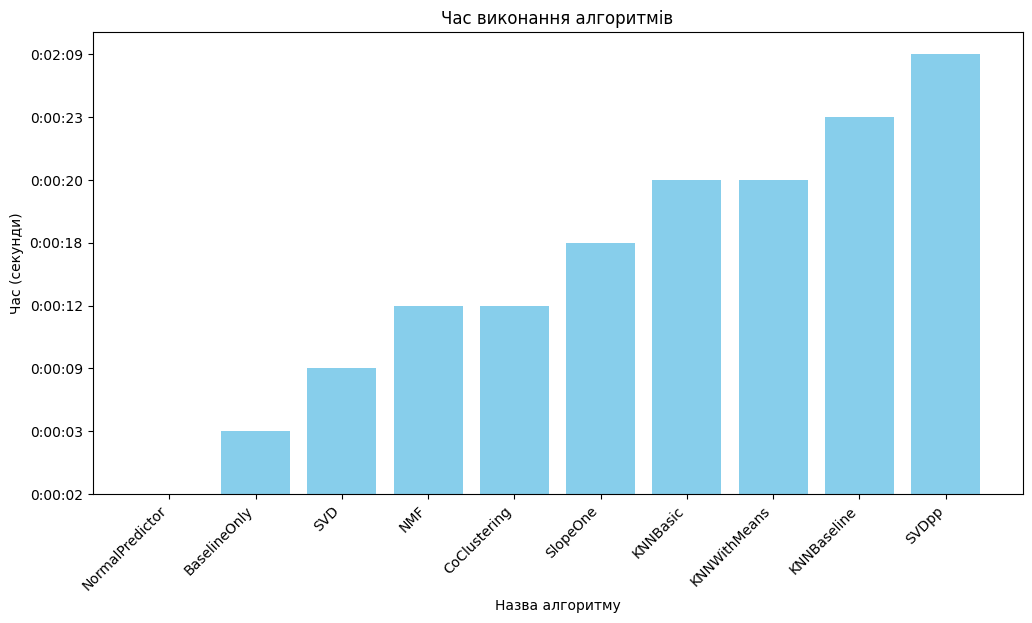

In [58]:
def plot_time_histogram(sorted_results_time):
    algorithm_names = [item[0] for item in sorted_results_time]
    times = [item[3] for item in sorted_results_time]
    plt.figure(figsize=(12, 6))
    plt.bar(algorithm_names, times, color='skyblue')
    plt.xlabel('Назва алгоритму')
    plt.ylabel('Час (секунди)')
    plt.title('Час виконання алгоритмів')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_time_histogram(sorted_results_time)


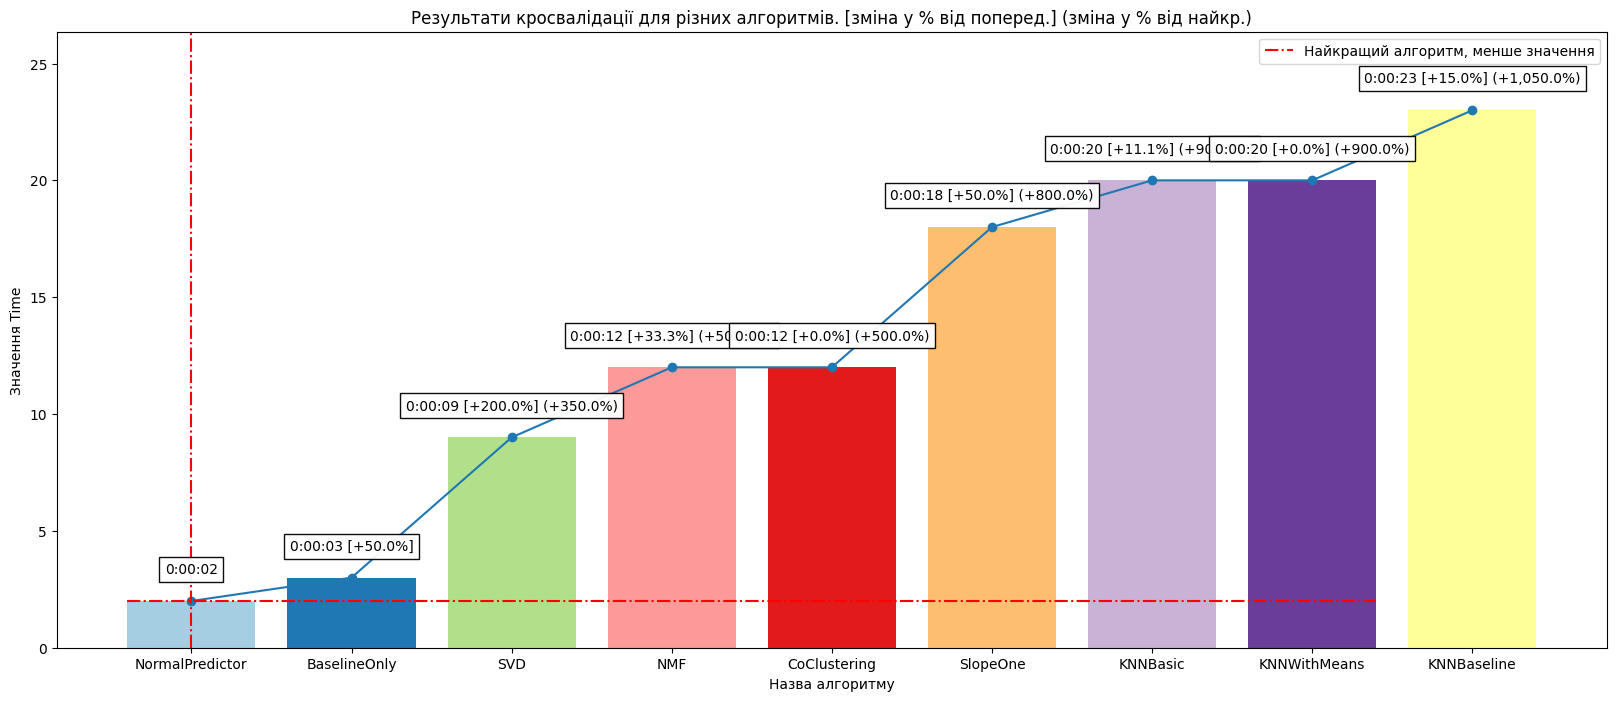

Найкращий алгоритм: NormalPredictor, зі значенням: 2 секунд


In [81]:
sorted_results_time_float = [(v[0], v[1], v[2], sum(int(x) * 60 ** i for i, x in enumerate(reversed(v[3].split(':'))))) for v in sorted_results_time]

def plot_algo_time(input_data: list, title_type: str="", ylabel_type: str="Time", column=None):

    x = range(len(input_data) - 1)  # Виправлено тут
    if column is None:
        y = [v[3] for v in input_data[:-1]]  # Виправлено тут
    else:
        y = [v[column] for v in input_data[:-1]]  # Виправлено тут

    y = np.array(y)

    plt.figure(figsize=(20, 8))
    h_y = y[-1] -  y[0]
    max_y = y[-1] + h_y * 0.16
    min_y = y[0] - h_y * 0.16
    min_y = 0 if min_y < 0 else min_y
    plt.ylim(min_y, max_y)
    plt.title(f"Результати {title_type} для різних алгоритмів. [зміна у % від поперед.] (зміна у % від найкр.)")

    cmap = plt.get_cmap('Paired')
    num_colors = len(x)
    colors_map = [cmap(i / num_colors) for i in range(num_colors)]
    colors = colors_map

    bar_w = 0.8

    plt.bar(x, height=y, width=bar_w, color=colors)
    plt.xticks(x, [v[0] for v in input_data[:-1]] )
    plt.plot(x, y, "o-")
    plt.xlabel("Назва алгоритму")
    plt.ylabel(ylabel_type)
    plt.vlines(x[0], min_y, max_y, color="red", linestyle="-.", label="Найкращий алгоритм, менше значення")
    plt.hlines(y[0], -bar_w / 2, len(x) - 2 + bar_w / 2, color="red", linestyle="-.")
    diff_y = np.diff(y) / y[:-1] * 100
    diff_y_best = y / y[0] * 100 - 100

    for i, val in enumerate(y):
        # Перетворюємо секунди назад у формат годин:хвилини:секунди
        text = str(datetime.timedelta(seconds=int(val)))
        if i > 0:
            text += f" [{round(diff_y[i-1], 1):+,}%]"
        if i > 1:
            text += f" ({round(diff_y_best[i], 1):+,}%)"

        plt.text(x[i], val + h_y * 0.05 , text, ha='center',  va='bottom', bbox=dict(facecolor='white', alpha=0.95))
    plt.legend(loc="best")
    plt.show()
    print(f"Найкращий алгоритм: {input_data[0][0]}, зі значенням: {input_data[0][3]} секунд")

plot_algo_time(sorted_results_time_float, "кросвалідації", "Значення Time")



In [ ]:
Найкращій алгорим
за точністю предбачення: SVDpp
за часом навчання моделі: NormalPredictor
за часом тестування моделі: NormalPredictor